In [1]:
from matplotlib import pyplot as plt
import numpy as np

# The Mandelbrot set

The Mandelbrot set is the set of complex numbers $c \in \mathbb{C}$ for which the iteration,

$$z_{n+1} = z_n^2 + c,$$

converges, starting iteration at $z_1 = 0$. We can visualize the Mandelbrot set by plotting the number of iterations needed for the absolute value $|z_n|$ to exceed 2 (for which it can be shown that the iteration always diverges).

In [34]:
from dataclasses import dataclass
from typing import Optional

max_iter = 256
width = 256
height = 256
center = -0.8+0.0j
extent = 3.0+3.0j


@dataclass
class BoundingBox:
    width: int
    height: int
    center: complex
    extent: complex
    _scale: Optional[float] = None
    
    @property
    def scale(self):
        if self._scale is None:
            self._scale = max(self.extent.real / self.width,
                              self.extent.imag / self.height)
        return self._scale


def compute_mandelbrot(box, max_iter):
    result = np.zeros(dtype=int, shape=(box.height, box.width))
    for j in range(box.height):
        for i in range(box.width):
            c = box.center \
              + (i - box.width // 2 + (j - box.height // 2)*1j) \
                * box.scale
            z = 0
            for k in range(max_iter):
                z = z**2 + c
                if (z * z.conjugate()).real > 4.0:
                    break
            result[j, i] = k
    return result
    
box = BoundingBox(256, 256, -0.8+0.0j, 3.0+3.0j)

In [37]:
def plot_fractal(box, values, ax=None):
    """Plot a fractal
    
    Returns:
        figure and axes
    """
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    else:
        fig = None
    plot_extent = (box.width + 1j * box.height) * box.scale
    z1 = box.center - plot_extent / 2
    z2 = z1 + plot_extent
    ax.imshow(values, origin='lower', extent=(z1.real, z2.real, z1.imag, z2.imag))
    ax.set_xlabel("$\Re(c)$")
    ax.set_ylabel("$\Im(c)$")
    return fig, ax

(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:xlabel='$\\Re(c)$', ylabel='$\\Im(c)$'>)

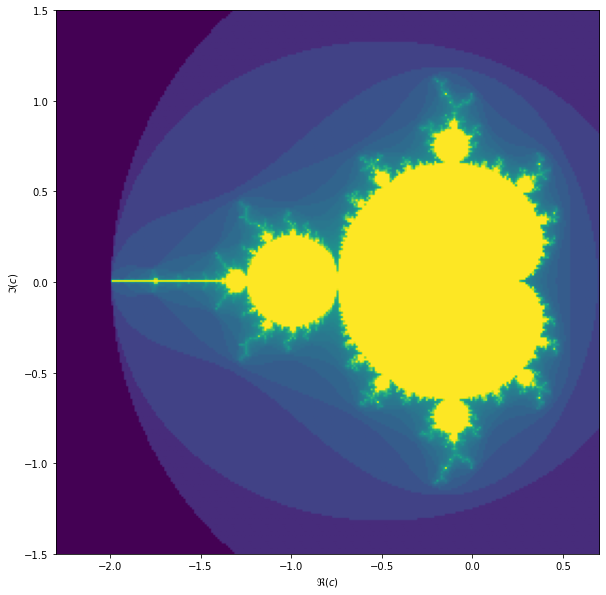

In [38]:
m = compute_mandelbrot(box, 256)
plot_fractal(box, np.log(m+1))

## Zoom in

The Mandelbrot set is a lot of fun to zoom into. We can play around with the `center` and `extent` values (and necessarily `max_iter`) to control our window.

In [26]:
max_iter = 1024
center = -1.1195+0.2718j
extent = 0.005+0.005j

zoom_box = BoundingBox(256, 256, center, extent)
m = compute_mandelbrot(zoom_box, max_iter)

(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:xlabel='$\\Re(c)$', ylabel='$\\Im(c)$'>)

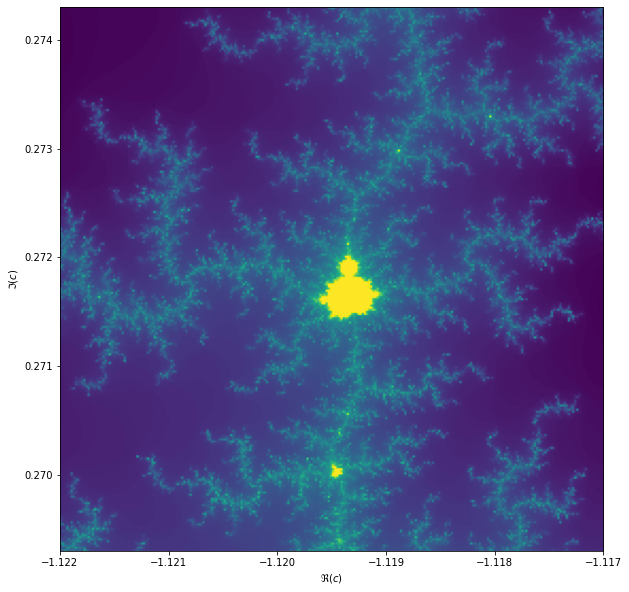

In [27]:
plot_fractal(zoom_box, np.log(m + 1))

## The (family of) Julia sets

For each value $c$ we can compute the Julia set, namely the set of starting values $z_1$ for which the iteration over $z_{n+1}=z_n^2 + c$ converges.

In [28]:
julia_box = BoundingBox(256, 256, 0.0+0.0j, 4.0+3.0j)

c = -1.1193+0.2718j

def compute_julia(box, c, max_iter):
    scale = box.scale()
    result = np.zeros(dtype=int, shape=(box.height, box.width))
    for j in range(box.height):
        for i in range(box.width):
            z = box.center \
              + (i - box.width // 2 + (j - box.height // 2)*1j) \
                * scale
            for k in range(max_iter):
                z = z**2 + c
                if (z * z.conjugate()).real > 4.0:
                    break
            result[j, i] = k
    return result

(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:xlabel='$\\Re(c)$', ylabel='$\\Im(c)$'>)

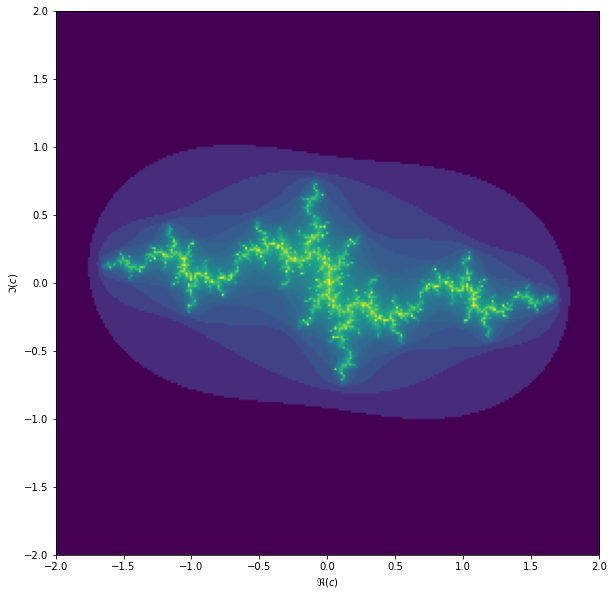

In [32]:
julia = compute_julia(julia_box, c, 256)
plot_fractal(julia_box, np.log(julia+1))

## Exercise

This is not even the worst code. Variables are aptly named and the code is nicely parametrized. However, this code utterly lacks in modularity. The author has never heard of classes or functions! Try to improve this code to get less repetition and better isolation of concerns, while at the same time bundling things that belong together. To achieve this you should consider using functions to isolate functionality, while using classes to bundle things that are related.

hint: Start by introducing enough abstraction so that zooming in on the Mandelbrot set becomes easier. Once you're happy with that (and there's time left) you could also generalise for including the Julia set.

In [39]:
def julia(c: complex):
    def init_julia(box, i, j):
        z = box.center \
          + (i - box.width // 2 + (j - box.height // 2)*1j) \
            * box.scale
        return z, c
    return init_julia

In [41]:
type(julia(1.0+0.5j))

function

In [42]:
julia(1.0+0.2j)

<function __main__.julia.<locals>.init_julia(box, i, j)>